In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np
from windy_gridworld import WindyGridworldEnv

[2017-02-11 13:52:36,206] You have 'numpy' version 1.10.1 installed, but 'gym' requires at least 1.10.4. HINT: upgrade via 'pip install -U numpy'.


In [9]:
UP = 0
RIGHT = 1
DOWN = 2
LEFT = 3

In [14]:
env = WindyGridworldEnv()

print(env.reset())
env.render()

env.step(RIGHT)
env.step(RIGHT)
env.render()

env.step(RIGHT)
env.render()

env.step(RIGHT)
env.render()

30
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
x  o  o  o  o  o  o  T  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o

o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  x  o  o  o  o  T  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o

o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  x  o  o  o  T  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o

o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  x  o  o  o  o  o
o  o  o  o  o  o  o  T  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o



In [18]:
# (observation, reward, done, info)
print env.step(RIGHT)

(6, -1.0, False, {'prob': 1.0})


-----

Implementation of SARSA

In [71]:
def Q_to_eps_greedy_policy(Q, eps=0.1):
    num_actions = Q.shape[1]
    pi = np.zeros(Q.shape[0],)
    for i in range(0, Q.shape[0]):
        if np.random.uniform(0,1) < eps:
            # choose a random action
            pi[i] = np.random.randint(0, num_actions)
        else:
            # take the argmax of Q[s,.]
            pi[i] = np.argmax(Q[i])
    return pi
        

In [91]:
env = WindyGridworldEnv()
Q = np.zeros((env.nS, env.nA))
num_iters = 200
alpha = 0.5
gamma = 1.0
eps_lengths = []
# repeat (for each episode)
for num_iter in range(num_iters):
    eps_length = 0
    env.reset()
    # initialise S
    S = env.s
    # choose A from S using policy derived from Q (e.g. eps-greedy)
    pi = Q_to_eps_greedy_policy(Q)
    A = pi[S]
    # repeat, for each step of episode
    while True:
        # take action A, observe R, S'
        _, R, is_done, _ = env.step(A)
        if is_done:
            break
        S_prime = env.s
        # choose A' from S' using policy derived from Q (e.g. eps-greedy)
        pi = Q_to_eps_greedy_policy(Q)
        A_prime = pi[S_prime]
        Q[S,A] = Q[S,A] + alpha*(R + (gamma*Q[S_prime,A_prime]) - Q[S,A])
        S = S_prime
        A = A_prime
        eps_length += 1
    #print "eps length:", eps_length
    eps_lengths.append(eps_length)

/Users/cjb60/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:26: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


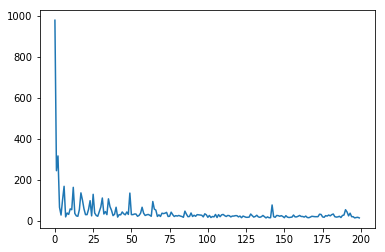

In [92]:
plt.plot(eps_lengths)

----

Implementation of Q-Learning

http://stats.stackexchange.com/questions/184657/difference-between-off-policy-and-on-policy-learning

https://studywolf.wordpress.com/2013/07/01/reinforcement-learning-sarsa-vs-q-learning/

In [93]:
env = WindyGridworldEnv()
Q = np.zeros((env.nS, env.nA))
num_iters = 200
alpha = 0.5
gamma = 1.0
eps_lengths2 = []
# repeat (for each episode)
for num_iter in range(num_iters):
    eps_length = 0
    env.reset()
    # initialise S
    S = env.s
    # repeat, for each step of episode
    while True:
        # choose A from S using policy derived from Q (e.g. eps-greedy)
        pi = Q_to_eps_greedy_policy(Q)
        A = pi[S]
        # take action A, observe R, S'
        _, R, is_done, _ = env.step(A)
        if is_done:
            break
        S_prime = env.s
        # we want to find argmax_a Q[S_prime, a]
        Q_as = []
        for a in range(env.nA):
            Q_as.append(Q[S_prime,a])
        A_max = np.argmax(Q_as)
        Q[S,A] = Q[S,A] + alpha*(R + (gamma*Q[S_prime,A_max]) - Q[S,A])
        S = S_prime
        eps_length += 1
    #print "eps length:", eps_length
    eps_lengths2.append(eps_length)

/Users/cjb60/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:28: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


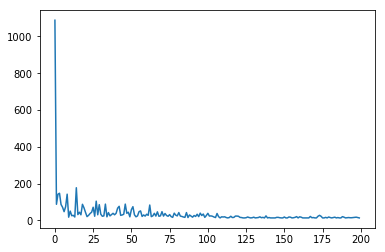

In [94]:
plt.plot(eps_lengths2)

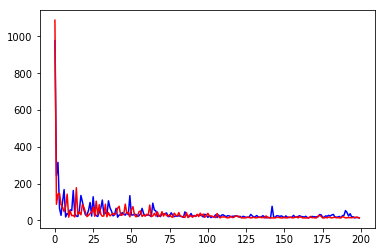

In [97]:
plt.plot(eps_lengths, 'b', eps_lengths2, 'r')

In [101]:
np.mean(eps_lengths), np.mean(eps_lengths2)

(40.299999999999997, 35.479999999999997)